<a href="https://colab.research.google.com/github/KhaSab5292/DS-Unit-1-Build/blob/master/Unit_1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [455]:
dfdogs = pd.read_csv('/content/drive/My Drive/Lambda/Unit 1/DOHMH_Dog_Bite_Data.csv')
print(dfdogs.shape)
dfdogs.head()

(10280, 9)


,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207


In [456]:
dfdogs.isnull().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed         1588
Age           4746
Gender           0
SpayNeuter       0
Borough          0
ZipCode       2667
dtype: int64

In [457]:
dfdogs.dtypes

UniqueID       int64
DateOfBite    object
Species       object
Breed         object
Age           object
Gender        object
SpayNeuter      bool
Borough       object
ZipCode       object
dtype: object

In [458]:
dfdogs.describe()

,UniqueID
count,10280.000000
mean,5140.500000
std,2967.724718
min,1.000000
25%,2570.750000
50%,5140.500000
75%,7710.250000
max,10280.000000


In [459]:
dfdogs.describe(exclude = 'number')

,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
count,10280,10280,8692,5534,10280,10280,10280,7613
unique,1096,1,1032,153,3,2,6,349
top,June 06 2015,DOG,Pit Bull,2,U,False,Queens,10029
freq,25,10280,1921,835,4448,7289,2520,166


# **Cleaning the dataset**

In [460]:
dfdogs['Gender'].value_counts()

U    4448
M    4203
F    1629
Name: Gender, dtype: int64

In [461]:
dfdogs['Borough'].value_counts()

Queens           2520
Manhattan        2354
Brooklyn         2281
Bronx            1757
Staten Island     931
Other             437
Name: Borough, dtype: int64

In [462]:
dfdogs = dfdogs.drop(columns = ['Species', 'Age', 'SpayNeuter', 'ZipCode'])
print(dfdogs.shape)
dfdogs.head()

(10280, 5)


,UniqueID,DateOfBite,Breed,Gender,Borough
0,1,January 02 2015,"Poodle, Standard",M,Brooklyn
1,2,January 02 2015,HUSKY,U,Brooklyn
2,3,January 02 2015,NaN,U,Brooklyn
3,4,January 01 2015,American Pit Bull Terrier/Pit Bull,M,Brooklyn
4,5,January 03 2015,American Pit Bull Terrier/Pit Bull,M,Brooklyn


In [463]:
dfdogs = dfdogs.rename(columns = {'Breed': 'DogBreed'})
dfdogs.isnull().sum()

UniqueID         0
DateOfBite       0
DogBreed      1588
Gender           0
Borough          0
dtype: int64

In [464]:
dfdogs = dfdogs.dropna(subset = ['DogBreed'])
print(dfdogs.shape)
dfdogs.isnull().sum()

(8692, 5)


UniqueID      0
DateOfBite    0
DogBreed      0
Gender        0
Borough       0
dtype: int64

In [465]:
dfdogs = dfdogs[dfdogs['Borough'] != 'Other']
print(dfdogs.shape)
dfdogs.head()

(8355, 5)


,UniqueID,DateOfBite,DogBreed,Gender,Borough
0,1,January 02 2015,"Poodle, Standard",M,Brooklyn
1,2,January 02 2015,HUSKY,U,Brooklyn
3,4,January 01 2015,American Pit Bull Terrier/Pit Bull,M,Brooklyn
4,5,January 03 2015,American Pit Bull Terrier/Pit Bull,M,Brooklyn
5,6,January 05 2015,American Pit Bull Terrier/Pit Bull,F,Brooklyn


In [466]:
dfdogs.describe(exclude = 'number')

,DateOfBite,DogBreed,Gender,Borough
count,8355,8355,8355,8355
unique,1095,993,3,5
top,June 06 2015,Pit Bull,M,Queens
freq,21,1886,3959,2189


# **Cleaning "Breed" column**

In [467]:
dfdogs['DogBreed'].value_counts().sort_values(ascending = False)

Pit Bull                                1886
American Pit Bull Terrier/Pit Bull       346
Shih Tzu                                 344
Chihuahua                                338
American Pit Bull Mix / Pit Bull Mix     327
                                        ... 
PIT BULL/GERMAN SHEPHARD                   1
HAVANESE X                                 1
BOSTEN TERRIER/ FRENCH BULL DOG            1
PEKINGESE -X                               1
JSCK RUSSEL/DALMATION                      1
Name: DogBreed, Length: 993, dtype: int64

In [0]:
def fix_breed_label(breed):
    if breed in ['American Pit Bull Terrier/Pit Bull', 'American Pit Bull Mix / Pit Bull Mix', 'PIT BULL MIX', 'BLUE NOSE PIT BULL', 'PITBULL']:
      return 'Pit Bull'
    elif breed in ['Siberian Husky', 'HUSKY -X', 'ALASKAN HUSKY MIX', 'ALASKA HUSKY', 'HUSKY']:
      return 'Husky '
    elif breed in ['Labrador Retriever Crossbreed', 'LABRADOR MIX']:
      return 'Labrador Retriever'
    elif breed in ['Bull dog', 'Bull Dog, English', 'Bull Dog, French', 'FRENCH BULL DOG', 'ENGLISH BULL DOG', 'BULLDOG MIX',
                   'BULL DOG X', 'French Bulldog']:
      return 'Bull Dog'
    elif breed in ['Poodle, Standard', 'MINI POODLE X', 'SCHNAUZER POODLE MIX', 'Poodle, Miniature', 'POODLE MIX', 'Poodle, Toy', 
                   'Poodle Crossbreed']:
      return 'Poodle'
    elif breed in ['Chihuahua Crossbreed', 'CHIHUAHUA', 'CHIHUAHUA- X']:
      return 'Chihuahua'
    elif breed in ['Yorkshire Terrier', 'American Staffordshire Terrier', 'BEAVER TERRIERS', 'TERRIER MIX', 'TERRIER', 
                   'BOSTON BORDER TERRIER', 'Boston Terrier', 'BOSTON TERRIER MIX', 'MIXED TERRIER', 'Yorkshire Terrier Crossbreed', 
                   'Staffordshire Bull Terrier', 'Bull Terrier', 'West High White Terrier', 'Jack Russell Terrier', 'Terrier mix']:
      return 'Terrier'
    elif breed in ['SHEPHERD', 'Australian Shepherd', 'German Shepherd', 'German Shepherd Crossbreed', 'SHEPHERD X', 
                   'GERMAN SHEPERD POINT MIX', 'German Shepherd Dog']:
      return 'Shepherd'
    elif breed in ['SHIH TZU MIX', 'Shih Tzu Crossbreed']:
      return 'Shih Tzu'
    elif breed in ['Beagle Crossbreed', 'BEAGLE HOUND']:
      return 'Beagle'
    elif breed in ['MUTT']:
      return 'Mutt'
    elif breed in ['GOLDEN RETRIEVER']:
      return 'Golden Retriever'
    elif breed in ['MIXED', 'UNKNOWN', 'Mixed/Other', 'NOT SURE, RESCUE', 'MIXED BREED', 'Unknown']:
      return 'Other' 
    else:
      return breed

In [469]:
dfdogs['DogBreed'] = dfdogs['DogBreed'].apply(fix_breed_label)
dfdogs['DogBreed'].value_counts().sort_values(ascending = False)

Pit Bull            2597
Terrier              537
Other                492
Chihuahua            383
Shih Tzu             362
                    ... 
BOXER/CATTLE           1
CAVASHU                1
AMERICAN TERRIER       1
LHATESE                1
PIT TERRIER MIX        1
Name: DogBreed, Length: 943, dtype: int64

In [470]:
counts = dfdogs['DogBreed'].value_counts()
dfdogs = dfdogs[~dfdogs['DogBreed'].isin(counts[counts < 50].index)]

print(dfdogs.shape)
dfdogs.head()

(6329, 5)


,UniqueID,DateOfBite,DogBreed,Gender,Borough
0,1,January 02 2015,Poodle,M,Brooklyn
1,2,January 02 2015,Husky,U,Brooklyn
3,4,January 01 2015,Pit Bull,M,Brooklyn
4,5,January 03 2015,Pit Bull,M,Brooklyn
5,6,January 05 2015,Pit Bull,F,Brooklyn


In [471]:
dfdogs['DogBreed'].value_counts()

Pit Bull              2597
Terrier                537
Other                  492
Chihuahua              383
Shih Tzu               362
Shepherd               342
Labrador Retriever     242
Bull Dog               207
Maltese                184
Poodle                 180
Rottweiler             152
Husky                  134
Jack Russ              109
Beagle                  92
Cocker Spaniel          91
Boxer                   62
Golden Retriever        59
Pomeranian              54
Shiba Inu               50
Name: DogBreed, dtype: int64

In [472]:
dfdogs = dfdogs[dfdogs['DogBreed'] != 'Other']
dfdogs.shape

(5837, 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


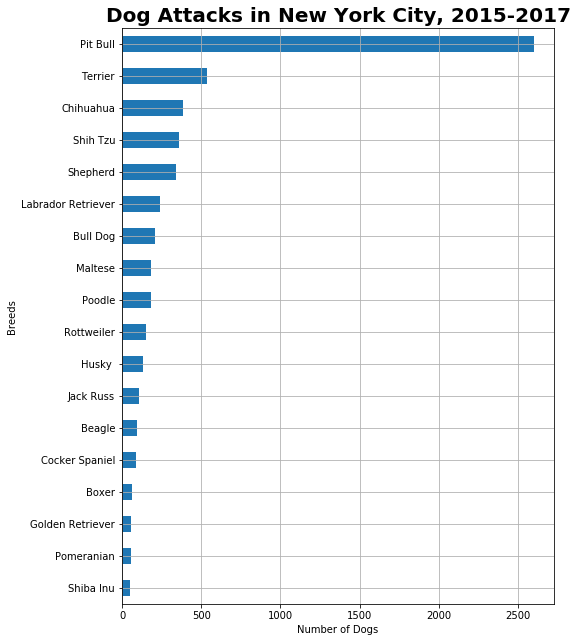

In [473]:
plt.axes([0, 0, 1, 2])
dfdogs['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Dog Attacks in New York City, 2015-2017", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()

# **Graphs by Year**

In [474]:
dfdogs['DateOfBite']

0         January 02 2015
1         January 02 2015
3         January 01 2015
4         January 03 2015
5         January 05 2015
               ...       
10265    December 14 2017
10267    December 15 2017
10269    December 14 2017
10271    December 17 2017
10274    December 21 2017
Name: DateOfBite, Length: 5837, dtype: object

In [475]:
df2015 = dfdogs[dfdogs['DateOfBite'].str.contains("2015")]
df2016 = dfdogs[dfdogs['DateOfBite'].str.contains("2016")]
df2017 = dfdogs[dfdogs['DateOfBite'].str.contains("2017")]
df2015.shape, df2016.shape, df2017.shape

((2041, 5), (1832, 5), (1964, 5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


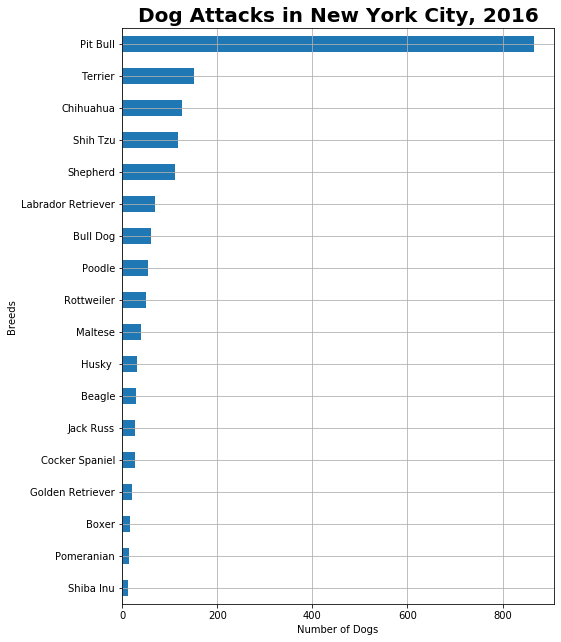

In [476]:
plt.axes([0, 0, 1, 2])
df2016['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Dog Attacks in New York City, 2016", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


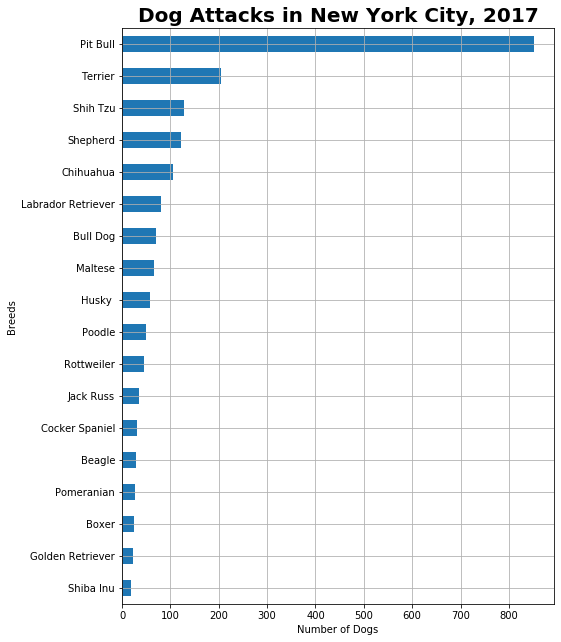

In [477]:
plt.axes([0, 0, 1, 2])
df2017['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Dog Attacks in New York City, 2017", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()

In [478]:
dfdogs['DogBreed'].describe()

count         5837
unique          18
top       Pit Bull
freq          2597
Name: DogBreed, dtype: object

# **Boroughs**

In [479]:
dfdogs['Borough'].value_counts()

Queens           1461
Brooklyn         1331
Bronx            1229
Manhattan        1195
Staten Island     621
Name: Borough, dtype: int64

In [480]:
df2015['Borough'].value_counts()

Queens           530
Brooklyn         467
Manhattan        422
Bronx            409
Staten Island    213
Name: Borough, dtype: int64

In [481]:
df2016['Borough'].value_counts()

Queens           473
Brooklyn         424
Bronx            386
Manhattan        348
Staten Island    201
Name: Borough, dtype: int64

In [482]:
df2017['Borough'].value_counts()

Queens           458
Brooklyn         440
Bronx            434
Manhattan        425
Staten Island    207
Name: Borough, dtype: int64

In [483]:
df2015['Year'] = '2015'
df2016['Year'] = '2016'
df2017['Year'] = '2017'
df2015.shape, df2016.shape, df2017.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

((2041, 6), (1832, 6), (1964, 6))

In [484]:
dfdogs = pd.concat([df2015, df2016, df2017])
print(dfdogs.shape)
pd.crosstab(dfdogs['Year'], dfdogs['Borough'])

(5837, 6)


Borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Year,,,,,
2015,409,467,422,530,213
2016,386,424,348,473,201
2017,434,440,425,458,207


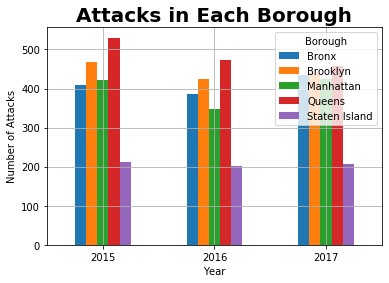

In [485]:
crosstab = pd.crosstab(dfdogs['Year'], dfdogs['Borough'])
crosstab.plot(kind = 'bar')

plt.title("Attacks in Each Borough", fontsize = 20, fontweight = 'bold')
plt.xlabel('Year')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Number of Attacks')

plt.grid()

# **Dog Registration**

In [486]:
df = pd.read_csv('/content/drive/My Drive/Lambda/Unit 1/NYC_Dog_Licensing_Dataset.csv')
print(df.shape)
df.head()

(345727, 10)


,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract Year
0,1,PAIGE,F,2014,American Pit Bull Mix / Pit Bull Mix,NaN,10035,09/12/2014,09/12/2017,2016
1,2,YOGI,M,2010,Boxer,NaN,10465,09/12/2014,10/02/2017,2016
2,3,ALI,M,2014,Basenji,NaN,10013,09/12/2014,09/12/2019,2016
3,4,QUEEN,F,2013,Akita Crossbreed,NaN,10013,09/12/2014,09/12/2017,2016
4,5,LOLA,F,2009,Maltese,NaN,10028,09/12/2014,10/09/2017,2016


In [487]:
df.isnull().sum()

RowNumber                  0
AnimalName               706
AnimalGender              18
AnimalBirthMonth           0
BreedName                  0
Borough               345727
ZipCode                    0
LicenseIssuedDate          0
LicenseExpiredDate         0
Extract Year               0
dtype: int64

In [488]:
df.describe()

,RowNumber,AnimalBirthMonth,Borough,ZipCode,Extract Year
count,345727.000000,345727.000000,0.0,345727.000000,345727.000000
mean,57637.653550,2011.278532,NaN,10694.652327,2017.013456
std,33295.226899,14.781626,NaN,1218.220439,0.815687
min,1.000000,1.000000,NaN,121.000000,2016.000000
25%,28811.000000,2008.000000,NaN,10029.000000,2016.000000
50%,57622.000000,2012.000000,NaN,10466.000000,2017.000000
75%,86432.000000,2015.000000,NaN,11226.000000,2018.000000
max,117371.000000,2018.000000,NaN,99508.000000,2018.000000


In [489]:
df.describe(exclude = 'number')

,AnimalName,AnimalGender,BreedName,LicenseIssuedDate,LicenseExpiredDate
count,345021,345709,345727,345727,345727
unique,22261,2,319,1571,2987
top,UNKNOWN,M,Unknown,09/13/2017,07/30/2017
freq,5379,189161,38785,844,1567


# **Cleaning**

In [490]:
df = df.drop(columns = ['AnimalBirthMonth', 'Borough', 'LicenseIssuedDate', 
                        'LicenseExpiredDate', 'ZipCode'])
df.shape

(345727, 5)

In [491]:
df = df.rename(columns = {'BreedName': 'DogBreed'})
df = df.dropna(subset = ['DogBreed', 'AnimalName', 'AnimalGender'])
print(df.shape)
df.isnull().sum()

(345003, 5)


RowNumber       0
AnimalName      0
AnimalGender    0
DogBreed        0
Extract Year    0
dtype: int64

In [492]:
df['DogBreed'].value_counts()

Unknown                38782
Yorkshire Terrier      21819
Shih Tzu               19592
Chihuahua              15625
Maltese                11361
                       ...  
Tosa                       1
Azawakh                    1
Portuguese Sheepdog        1
Karelian Bear Dog          1
Stabyhoun                  1
Name: DogBreed, Length: 319, dtype: int64

In [493]:
df['DogBreed'] = df['DogBreed'].apply(fix_breed_label)
df['DogBreed'].value_counts()

Terrier                41837
Other                  38782
Shih Tzu               24595
Chihuahua              20309
Labrador Retriever     19833
                       ...  
Stabyhoun                  1
Azawakh                    1
Tosa                       1
Portuguese Sheepdog        1
Karelian Bear Dog          1
Name: DogBreed, Length: 298, dtype: int64

In [494]:
df = df[df['DogBreed'] != 'Other']
counts = df['DogBreed'].value_counts()
df = df[~df['DogBreed'].isin(counts[counts < 4000].index)]

print(df.shape)
df.head()

(207730, 5)


,RowNumber,AnimalName,AnimalGender,DogBreed,Extract Year
0,1,PAIGE,F,Pit Bull,2016
4,5,LOLA,F,Maltese,2016
7,8,CHEWBACCA,F,Labrador Retriever,2016
9,10,MASSIMO,M,Bull Dog,2016
11,12,LEMMY,F,Terrier,2016


In [495]:
df['DogBreed'].value_counts()

Terrier               41837
Shih Tzu              24595
Chihuahua             20309
Labrador Retriever    19833
Pit Bull              18623
Poodle                15498
Shepherd              12098
Maltese               11361
Bull Dog               8874
Beagle                 8768
Pomeranian             6322
Havanese               5898
Golden Retriever       5176
Cocker Spaniel         4342
Shiba Inu              4196
Name: DogBreed, dtype: int64

# **Graphing**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


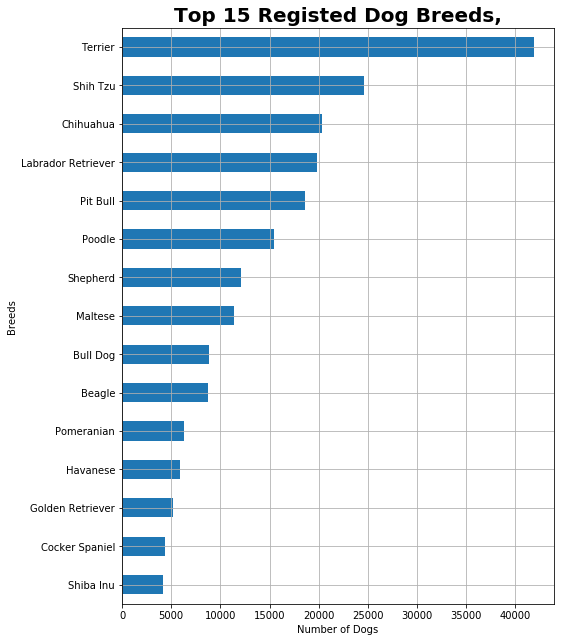

In [496]:
plt.axes([0, 0, 1, 2])
df['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Top 15 Registed Dog Breeds,", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()

In [497]:
df_2016 = df[df['Extract Year'] == 2016]
df_2017 = df[df['Extract Year'] == 2017]
df_2018 = df[df['Extract Year'] == 2018]
df_2016.shape, df_2017.shape, df_2018.shape

((67538, 5), (70238, 5), (69954, 5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


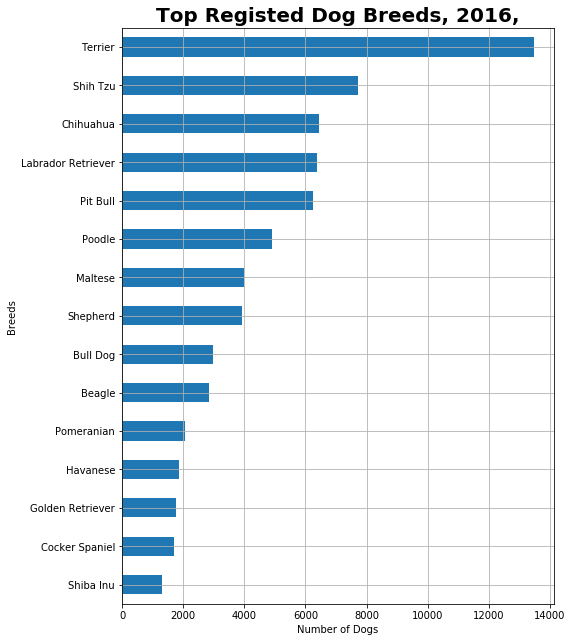

In [498]:
plt.axes([0, 0, 1, 2])
df_2016['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Top Registed Dog Breeds, 2016,", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


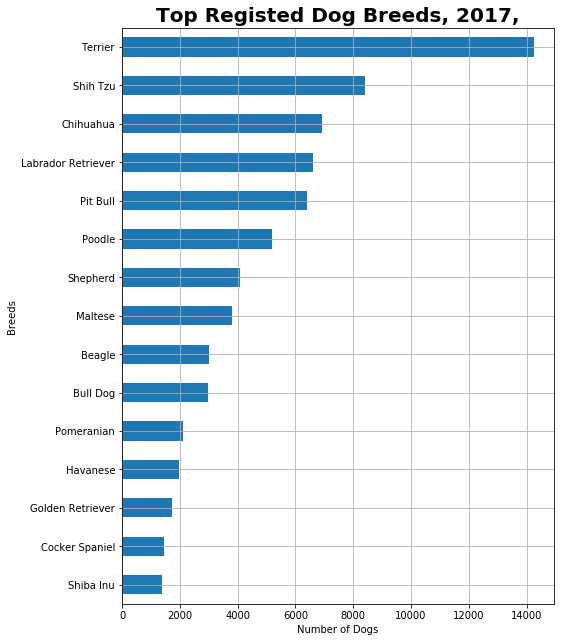

In [499]:
plt.axes([0, 0, 1, 2])
df_2017['DogBreed'].value_counts().sort_values().plot('barh')

plt.title("Top Registed Dog Breeds, 2017,", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of Dogs')
plt.ylabel('Breeds')

plt.grid()